## Mushroom Classification

### Introduction About the Data :

**The dataset** The goal is to predict `class`(poisonous or edible) of given mushroom (Classification Analysis).

There are 22 independent variables (there is no `id` column):

Attribute Information: ()

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Target variable:
* `class`: edible=e, poisonous=p

Dataset Source Link :
https://www.kaggle.com/datasets/uciml/mushroom-classification?select=mushrooms.csv

Importing necessary libraries

In [2]:
import os
import sys
import numpy as np
from numpy import array 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pydotplus


In [3]:
## Data Ingestions step

In [3]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from cassandracsv import CassandraCsv

cloud_config= {
  'secure_connect_bundle': os.path.join(os.getcwd(), 'secure-connect-mushrooms.zip')
}
auth_provider = PlainTextAuthProvider('OHzAlMtmSMGeBtdPqdZcrUHl', 'yy_PfrJIa-49jCfM-sRCb+d7xcBZdbZ8fJ6h0q.+n.b_8IFgfbtvsvNec0pK,FTqLt9NBXYg-iPPqh5JlEmXLlrb_ZFK1DosAMD8yFOE7G9e_PQYO4,1eI5B4BzZPnnG')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

row = session.execute("select release_version from system.local").one()
if row:
  print(row[0])
else:
  print("An error occurred.")

4.0.0.6816


In [4]:
session= cluster.connect('ineuron_mlprojects')
# session= cluster.connect('keyspace')

In [56]:
data = session.execute("SELECT * FROM mushroom_csv;")

data = pd.DataFrame([d for d in data])
data

,classs,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,b,f,n,f,n,f,c,n,w,...,y,w,n,p,w,o,e,w,v,d\n
1,p,b,f,n,f,n,f,c,n,w,...,y,w,y,p,w,o,e,w,v,d\n
2,p,b,f,y,f,n,f,c,n,w,...,y,w,n,p,w,o,e,w,v,d\n
3,p,b,f,y,f,n,f,c,n,w,...,y,w,y,p,w,o,e,w,v,d\n
4,p,b,g,w,t,n,f,w,n,w,...,s,w,w,p,w,o,p,w,c,l\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,x,y,y,t,l,f,c,b,w,...,y,w,w,p,w,o,p,k,y,p\n
8120,e,x,y,y,t,l,f,c,b,w,...,y,w,w,p,w,o,p,n,s,g\n
8121,e,x,y,y,t,l,f,c,b,w,...,y,w,w,p,w,o,p,n,s,p\n
8122,e,x,y,y,t,l,f,c,b,w,...,y,w,w,p,w,o,p,n,y,g\n


In [48]:
data['habitat'].unique() # there is 'l' in the last row, we will not select the last row

array(['d\n', 'l\n', 'g\n', 'm\n', 'p\n', 'u\n', 'w\n', 'l'], dtype=object)

In [52]:
data['habitat']=data['habitat'].map({'d\n':'d', 'l\n':'l', 'g\n':'g', 'm\n':'m', 'p\n':'p', 'u\n':'u', 'w\n':'w', 'l':'l'})

In [53]:
data['habitat'].unique()

array(['d', 'l', 'g', 'm', 'p', 'u', 'w'], dtype=object)

In [49]:
data['veil_color'].unique()

array(['w', 'y', 'n', 'o'], dtype=object)

### cannot use - in column names, it throws syntax error. We have to use _ instead. 
### While uploading raw data use _ in the column names. After downloading the data change it back to - .
### remove the column names from the csv file while uploading
### Keep the file you want to upload in such a directory where the path name has no space in the names of folders
### had to rename class to classs

In [ ]:
# putting data in cassandra
#session.execute('CREATE TABLE test_csv_import (car_make text, car_model text, start_year int)')
#session.execute('COPY test_csv_import (car_make, car_model, start_year) FROM <<path of the file>> WITH DELIMITER= "," AND HEADER= TRUE')

# to get the data
#session.execute('SELECT * FROM test_csv_import') 

# putting data in cassandra
#session.execute("CREATE TABLE mushroom_test_csv (class text PRIMARY KEY,cap-shape text,cap-surface text,cap-color text,bruises text,odor text,gill-attachment text,gill-spacing text,gill-size text,gill-color text,stalk-shape text,stalk-root text,stalk-surface-above-ring text,stalk-surface-below-ring text,stalk-color-above-ring text,stalk-color-below-ring text,veil-type text,veil-color text,ring-number text,ring-type text,spore-print-color text,population text,habitat text)")
#session.execute("CREATE TABLE mushroom_test (class text,cap-shape text,cap-surface text, PRIMARY KEY (class, cap-shape))")

In [ ]:
###example of putting new table in cassandra
#qry= '''
#create table students (
#   studentID int,
#   name text,
#   age int,
#   marks int,
#   primary key(studentID)
#);'''
#session.execute(qry)

In [ ]:
#qry= '''
#drop table students
#'''
#session.execute(qry)


In [44]:
qry= '''
create table mushroom_csv (
   classs text,
   cap_shape text,
   cap_surface text,
   cap_color text,
   bruises text,
   odor text,
   gill_attachment text,
   gill_spacing text,
   gill_size text,
   gill_color text,
   stalk_shape text,
   stalk_root text,
   stalk_surface_above_ring text,
   stalk_surface_below_ring text,
   stalk_color_above_ring text,
   stalk_color_below_ring text,
   veil_type text,
   veil_color text,
   ring_number text,
   ring_type text,
   spore_print_color text,
   population text,
   habitat text, 
   primary key(classs,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat)
   );'''
session.execute(qry)





In [27]:
#session.execute('DROP TABLE mushroom_csv')

In [45]:
prepared = session.prepare("""
        INSERT INTO mushroom_csv (classs,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat) 
        VALUES (?, ?, ?, ?, ?, ?, ?, ?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
        """)

In [46]:
with open(r'C:\Users\MS\Desktop\mushrooms.csv') as mushrooms:
    for cols in mushrooms:
        columns=cols.split(",")
        #pickup=datetime.datetime.strptime(columns[0],"%Y-%m-%d").date()
        #dropoff=datetime.datetime.strptime(columns[1],"%Y-%m-%d").date()
        classs=columns[0]
        cap_shape=columns[1]
        cap_surface=columns[2]
        cap_color=columns[3]
        bruises=columns[4]
        odor=columns[5]
        gill_attachment=columns[6]
        gill_spacing=columns[7]
        gill_size=columns[8]
        gill_color=columns[9]
        stalk_shape=columns[10]
        stalk_root=columns[11]
        stalk_surface_above_ring=columns[12]
        stalk_surface_below_ring=columns[13]
        stalk_color_above_ring=columns[14]
        stalk_color_below_ring=columns[15]
        veil_type=columns[16]
        veil_color=columns[17]
        ring_number=columns[18]
        ring_type=columns[19]
        spore_print_color=columns[20]
        population=columns[21]
        habitat=columns[22]
        


        session.execute(prepared, [classs,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat])

#closing the file
mushrooms.close()

#closing Cassandra connection
#session.shutdown()

In [ ]:
'''
qry="""
COPY mushroom_csv 
(class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat) 
FROM 'C:\Users\MS\Desktop\mushrooms.csv' 
WITH DELIMITER= ','
AND HEADER= TRUE
;"""
session.execute(qry)
'''

In [ ]:
#session.execute('''COPY mushroom_csv (class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat) FROM 'C:\Users\MS\Desktop\mushrooms.csv' WITH DELIMITER=',' AND HEADER=TRUE;''')

In [43]:
# dropping all previously loaded data
#qry= '''
#drop table students
#'''
#session.execute(qry)
######################
qry= '''
drop table mushroom_csv
'''
session.execute(qry)

In [ ]:
'''
rows = session.execute('SELECT * FROM mushroom_csv')
for row in rows:
    print (row)
    '''

In [52]:
result= session.execute('SELECT * FROM mushroom_csv')
CassandraCsv.export(
    result, 
    output_dir= r'D:\F Drive\ineuron\Internship\Mushroom Classification ML Project\Mushroom Classification Working Directory\notebooks\data', 
    filename='mushroom_csv', 
    separator=',', 
    with_header=True 
   )

In [55]:
data=pd.read_csv('data/mushroom_csv.csv')
data.head()

,Classs,Cap_Shape,Cap_Surface,Cap_Color,Bruises,Odor,Gill_Attachment,Gill_Spacing,Gill_Size,Gill_Color,...,Stalk_Surface_Below_Ring,Stalk_Color_Above_Ring,Stalk_Color_Below_Ring,Veil_Type,Veil_Color,Ring_Number,Ring_Type,Spore_Print_Color,Population,Habitat
0,p,b,f,n,f,n,f,c,n,w,...,y,w,n,p,w,o,e,w,v,d\n
1,p,b,f,n,f,n,f,c,n,w,...,y,w,y,p,w,o,e,w,v,d\n
2,p,b,f,y,f,n,f,c,n,w,...,y,w,n,p,w,o,e,w,v,d\n
3,p,b,f,y,f,n,f,c,n,w,...,y,w,y,p,w,o,e,w,v,d\n
4,p,b,g,w,t,n,f,w,n,w,...,s,w,w,p,w,o,p,w,c,l\n


In [58]:
data.shape

(8125, 23)

In [56]:
data.columns= data.columns.str.lower()
data.columns

Index(['classs', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [60]:
data.columns = data.columns.str.replace("_", "-")
data.columns

Index(['classs', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
#session.execute('COPY mushroom_test_csv (class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat) FROM D:\F Drive\ineuron\Internship\Mushroom Classification ML Project\Mushroom Classification Working Directory\notebooks\data\mushrooms.csv WITH DELIMITER= "," AND HEADER= TRUE')

In [67]:
#for row in rows:
 #   print (row[0:23])

In [ ]:
#session.execute('SELECT * from mushroom_csv') > output.txt

In [25]:
'''
def getAstraHTTPClient():
    """Get Astra connection information from environment variables"""

    ASTRA_DB_ID = os.environ.get('OHzAlMtmSMGeBtdPqdZcrUHl')
    ASTRA_DB_SECRET = os.environ.get('yy_PfrJIa-49jCfM-sRCb+d7xcBZdbZ8fJ6h0q.+n.b_8IFgfbtvsvNec0pK,FTqLt9NBXYg-iPPqh5JlEmXLlrb_ZFK1DosAMD8yFOE7G9e_PQYO4,1eI5B4BzZPnnG')
    ASTRA_DB_APPLICATION_TOKEN = os.environ.get('AstraCS:OHzAlMtmSMGeBtdPqdZcrUHl:139170592a361fb33586273da3c7fe641098c85b52c3ef3ea68338887eff105a')
    
    # setup an Astra Client
    return create_client(astra_database_id=ASTRA_DB_ID,
                         astra_database_region=ASTRA_DB_SECRET,
                         astra_application_token=ASTRA_DB_APPLICATION_TOKEN)
                         '''

In [4]:

data=pd.read_csv('data/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preliminary data exploration

In [5]:
data.info() # none of the columns are numerical. All columns are catagorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All the nominal catagories. None of the catagories are ordinal. So feature scaling not required.

In [6]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
data.shape

(8124, 23)

In [8]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [9]:
## check for duplicated records
data.duplicated().sum()

0

### Checking for missing values

In [10]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

This shows that there are no missing values in the dataset. But on close inspection, however in the data description we find that the missing values have been replaced by '?'. We have to handle it by replacing them with numpy "nan".

In [11]:
for cols in data.columns:
  unique_values= data[cols].unique()
  print (cols,'  =  ', unique_values)

class   =   ['p' 'e']
cap-shape   =   ['x' 'b' 's' 'f' 'k' 'c']
cap-surface   =   ['s' 'y' 'f' 'g']
cap-color   =   ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises   =   ['t' 'f']
odor   =   ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment   =   ['f' 'a']
gill-spacing   =   ['c' 'w']
gill-size   =   ['n' 'b']
gill-color   =   ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape   =   ['e' 't']
stalk-root   =   ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring   =   ['s' 'f' 'k' 'y']
stalk-surface-below-ring   =   ['s' 'f' 'y' 'k']
stalk-color-above-ring   =   ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring   =   ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type   =   ['p']
veil-color   =   ['w' 'n' 'o' 'y']
ring-number   =   ['o' 't' 'n']
ring-type   =   ['p' 'e' 'l' 'f' 'n']
spore-print-color   =   ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population   =   ['s' 'n' 'a' 'v' 'y' 'c']
habitat   =   ['u' 'g' 'm' 'd' 'p' 'w' 'l']


stalk-root column has some ? entries for missing values.

In [12]:
# finding the columns having '?' as data
for cols in data.columns:
    counts= data[cols][data[cols]=='?'].count()
    if counts != 0:
        print(cols,'  =  ', counts)

stalk-root   =   2480


### Checking if our dataset is balanced

<AxesSubplot:xlabel='class', ylabel='count'>

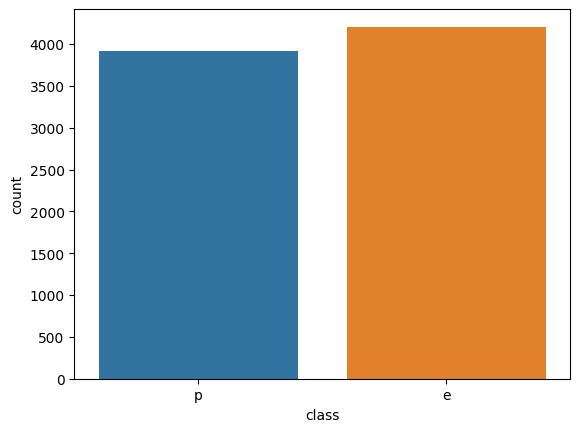

In [14]:
sns.countplot(x=data["class"]) # the dataset is quite balanced